<a href="https://colab.research.google.com/github/malihasama07/ML-AI/blob/main/Emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Emotion detection/Emotion_detection.csv')

In [ ]:
emotion_cols = ['Love', 'Joy', 'Anger', 'Surprise', 'Sadness', 'Fear', 'Hate', 'Normal']

# Step 1: Replace NaN with 0
df[emotion_cols] = df[emotion_cols].fillna(0)

# Step 2: Convert all possible values to numeric safely (ignore errors)
for col in emotion_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

print("✅ Emotion columns cleaned successfully!")
print(df[emotion_cols].head())


✅ Emotion columns cleaned successfully!
   Love  Joy  Anger  Surprise  Sadness  Fear  Hate  Normal
0     0    1      0         0        0     0     0       0
1     0    1      0         0        0     0     0       1
2     0    1      0         0        0     0     0       1
3     0    0      0         0        1     0     0       0
4     0    0      0         0        0     0     0       1


In [ ]:
df.head()

,Data,Love,Joy,Anger,Surprise,Sadness,Fear,Hate,Normal,topic,Domain
0,Youtube ar volg gula boring hoia jaitase din d...,0,1,0,0,0,0,0,0,Vlog,Twitter
1,"Your video making, camera work is really good....",0,1,0,0,0,0,0,1,Education,Twitter
2,You made me nostalgic. College life a ei dokan...,0,1,0,0,0,0,0,1,Vlog,Twitter
3,"Workshop ta engaging, but resources ta insuffi...",0,0,0,0,1,0,0,0,Entertainment,Twitter
4,Win hoy nay but anek valo khelecu,0,0,0,0,0,0,0,1,Technology,Twitter


In [ ]:
import os
import re
import string
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
print(df.shape);


(49599, 11)


In [ ]:
display(df.head());


,Data,Love,Joy,Anger,Surprise,Sadness,Fear,Hate,Normal,topic,Domain
0,Youtube ar volg gula boring hoia jaitase din d...,0,1,0,0,0,0,0,0,Vlog,Twitter
1,"Your video making, camera work is really good....",0,1,0,0,0,0,0,1,Education,Twitter
2,You made me nostalgic. College life a ei dokan...,0,1,0,0,0,0,0,1,Vlog,Twitter
3,"Workshop ta engaging, but resources ta insuffi...",0,0,0,0,1,0,0,0,Entertainment,Twitter
4,Win hoy nay but anek valo khelecu,0,0,0,0,0,0,0,1,Technology,Twitter


In [ ]:
display(df.tail())

,Data,Love,Joy,Anger,Surprise,Sadness,Fear,Hate,Normal,topic,Domain
49594,"prithibite emon onek manush royeche, jader mod...",0,0,0,0,0,0,1,0,personal,Youtube
49595,sbai afran nisho boser natok bole gola fatacch...,0,0,0,0,0,0,1,0,Entertainment,Youtube
49596,safa opmaner prtishodh neoyar jonjo eta korech...,0,0,0,0,0,0,1,0,personal,Youtube
49597,ki mjaciur ekta kaj! ashfak nipunra ache bolei...,0,0,0,0,0,0,1,0,Entertainment,Youtube
49598,jdio afran nishu bos ache boser natok bad dey ...,0,0,0,0,0,0,1,0,Entertainment,Youtube


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49599 entries, 0 to 49598
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      49595 non-null  object
 1   Love      49599 non-null  int64 
 2   Joy       49599 non-null  int64 
 3   Anger     49599 non-null  int64 
 4   Surprise  49599 non-null  int64 
 5   Sadness   49599 non-null  int64 
 6   Fear      49599 non-null  int64 
 7   Hate      49599 non-null  int64 
 8   Normal    49599 non-null  int64 
 9   topic     49599 non-null  object
 10  Domain    49599 non-null  object
dtypes: int64(8), object(3)
memory usage: 4.2+ MB
None


In [ ]:
print("Missing per col:\n", df.isna().sum())



Missing per col:
 Data        4
Love        0
Joy         0
Anger       0
Surprise    0
Sadness     0
Fear        0
Hate        0
Normal      0
topic       0
Domain      0
dtype: int64


In [ ]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 90


In [ ]:
#Check how many duplicate texts exist
df['Data'] = df['Data'].astype(str)  # make sure it's string
duplicate_count = df['Data'].duplicated().sum()
print("🔁 Total duplicate texts:", duplicate_count)


🔁 Total duplicate texts: 867


In [ ]:
#Show only duplicate rows (to inspect them)
duplicates = df[df['Data'].duplicated(keep=False)]
display(duplicates)



,Data,Love,Joy,Anger,Surprise,Sadness,Fear,Hate,Normal,topic,Domain
71,valo kono offer nei..gp ei valo..1 takay 100 m...,0,0,1,0,0,0,0,0,Brand,Youtube
261,Robi app ta sohoj Mone hoy. Airtel o Robi app ...,0,0,0,0,0,0,0,1,Vlog,Instragram
286,Puraton version valoi chilo.4tk 512mb for 4 ho...,0,0,0,0,1,0,0,1,Vlog,Instragram
287,Puraton version valoi chilo.4tk 512mb for 4 ho...,0,0,0,0,1,0,0,1,Vlog,Instragram
484,Kom tky vlo kichu provide koren apnara bt pblm...,0,0,1,0,0,0,0,0,Vlog,Youtube
...,...,...,...,...,...,...,...,...,...,...,...
47312,jhalkatite je 2 jonke krospayar dilo se jonjo ...,0,0,0,0,0,0,1,0,personal,Instagram
47329,6000 taka mamla!,0,0,0,0,0,0,1,0,Politics,Instagram
47330,71 tivi songbad noy mithjacar.eder khobor bish...,0,0,0,0,0,0,1,0,personal,Instagram
49466,jdio afran nishu bos ache boser natok bad dey ...,0,0,0,0,0,0,1,0,Entertainment,Youtube


In [ ]:
#If you just want to see the repeated text values (not full rows)
dup_texts = df['Data'][df['Data'].duplicated()].unique()
print("🔁 Duplicate text samples:")
for t in dup_texts[:10]:  # show first 10
    print("-", t)


🔁 Duplicate text samples:
- Puraton version valoi chilo.4tk 512mb for 4 hour akhon ar nei
- Kom tky vlo kichu provide koren apnara bt pblm ta holo j kono pack er meyad khubi kom smy kno den apnra aktu time ba smy baraiya dite paren na..???
- kichoi nai ei version a old tai onek valo
- Good. Tbe amr package golo oto tao vlo na. 7 days package hle beshi vlo hoii
- App Valo ... Kinto MB onek dam diye kinte hoy. 1gb 5taka thakle Valo hoto ..miad 5din
- amr phn a atodin valo cilo calaya onk mojaw paici but aj hotat korei login nicche na ata fix kora ucit
- Ajhane offer bhalo kintu aktuo bhalo network nai
- Age valo offer dito akhon ar valo offer dayna.
- Age valo chilo...akhn baler app hoye gece
- Age onek valo clo but akhon khub kharap mb er dam onek besi kore felce


In [ ]:
#If you want to count how many times each text repeats
dup_counts = df['Data'].value_counts()
dup_counts = dup_counts[dup_counts > 1]
print(dup_counts)


Data
nan                                                                                                                                                                  4
net chara colle vlo hoto                                                                                                                                             2
ekta pjaca deke uthlo ekta dak je oi poribeshe etta voyer onuvutike niye aste pare ta kebolmatro vuktvogii upolobdhi korte parbe                                     2
obostha mone hocche kharaper dikei sokolke ekhni aro sotorko hote hobe he Allah tumi sobaike rokkha  koro                                                            2
sekhane giye tara ja dekhlo ta dekhar jonjo tara moteo prostut chilo na drishjta dekhe atke matite bose porlo tader mostisko ar shorir jeno obosh hoye jete laglo    2
                                                                                                                                                                

In [ ]:
#To remove duplicates based on “Data”
df = df.drop_duplicates(subset=['Data']).reset_index(drop=True)
print("✅ Duplicates removed. New shape:", df.shape)


✅ Duplicates removed. New shape: (48732, 11)


In [ ]:
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [ ]:
EMOTION_COLS = ['Love', 'Joy', 'Anger', 'Surprise', 'Sadness', 'Fear', 'Hate', 'Normal']
print(df[EMOTION_COLS].sum())


Love        4320
Joy         6858
Anger       6891
Surprise    6933
Sadness     6940
Fear        6714
Hate        7064
Normal      5173
dtype: int64


In [ ]:
# 3) Basic label distribution
print("\n--- emotion positive counts (before cleaning) ---")
for c in EMOTION_COLS:
    # try safe numeric count (works if values are 0/1/NaN or strings)
    try:
        cnt = pd.to_numeric(df[c], errors='coerce').fillna(0).astype(int).sum()
    except Exception:
        cnt = (df[c] == 1).sum()
    print(f"{c}: {cnt}")


--- emotion positive counts (before cleaning) ---
Love: 4320
Joy: 6858
Anger: 6891
Surprise: 6933
Sadness: 6940
Fear: 6714
Hate: 7064
Normal: 5173


In [ ]:
print("📊 Descriptive Statistics:")
display(df.describe())

📊 Descriptive Statistics:


,Love,Joy,Anger,Surprise,Sadness,Fear,Hate,Normal
count,48732.000000,48732.000000,48732.000000,48732.000000,48732.000000,48732.000000,48732.000000,48732.000000
mean,0.088648,0.140729,0.141406,0.142268,0.142412,0.137774,0.144956,0.106152
std,0.284238,0.347745,0.348444,0.349328,0.349475,0.344666,0.352060,0.308035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



📈 Histograms for numeric columns:


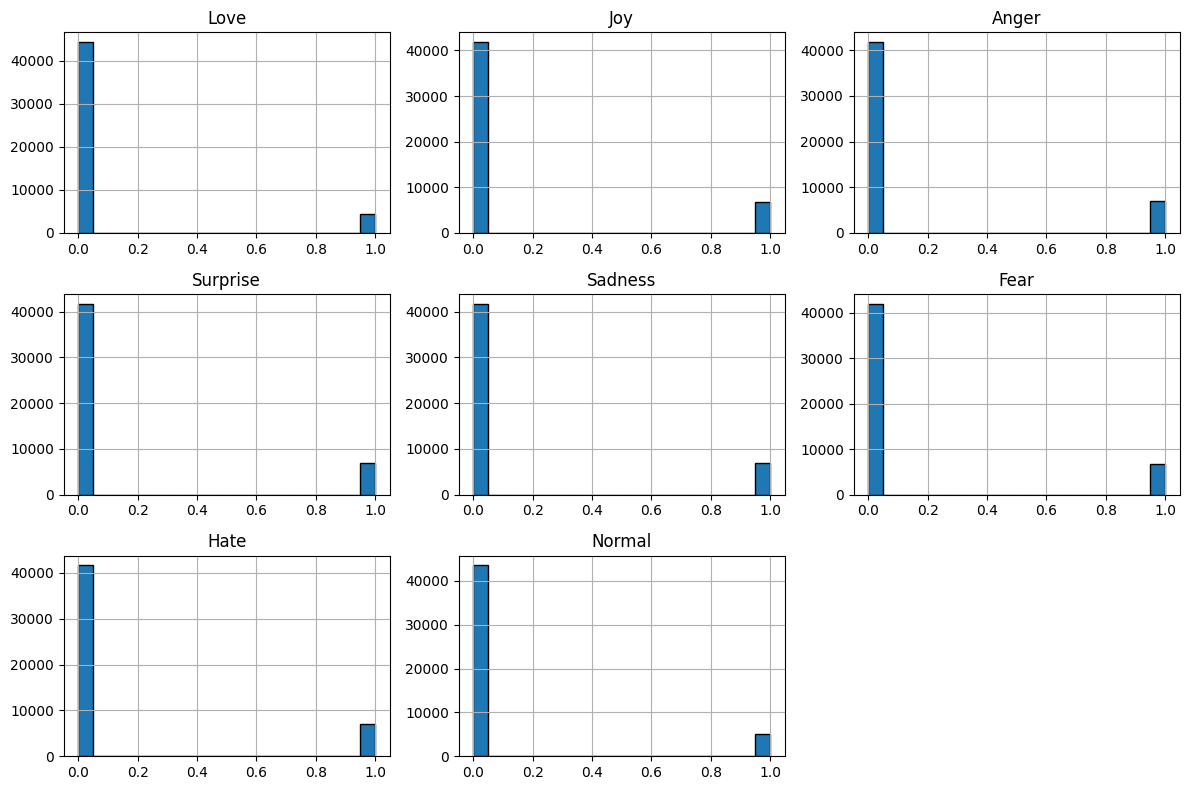

In [ ]:
# 2) Histograms to understand distribution
print("\n📈 Histograms for numeric columns:")
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()





📦 Boxplots for numeric columns:


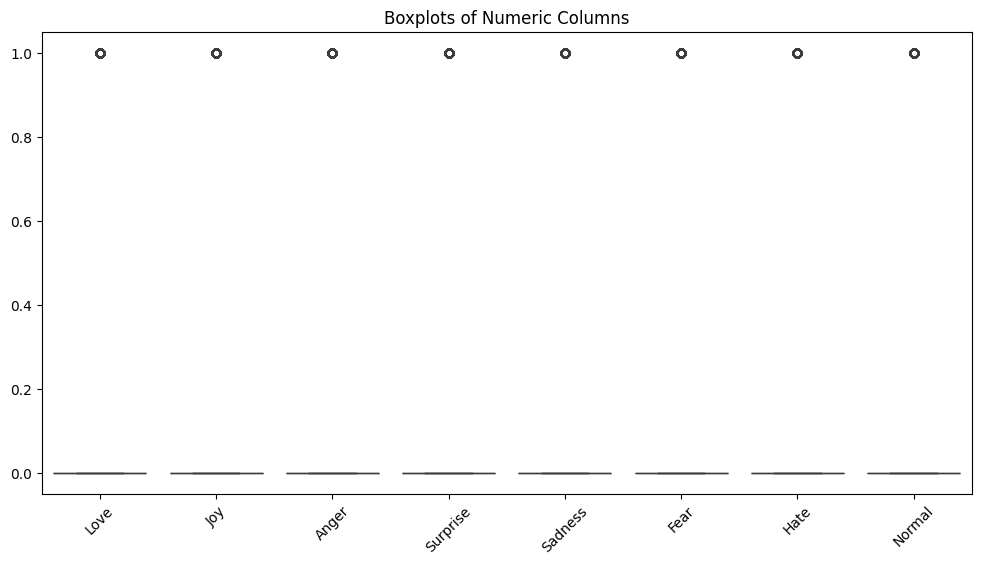

In [ ]:
# 3) Boxplots to identify outliers
print("\n📦 Boxplots for numeric columns:")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots of Numeric Columns")
plt.xticks(rotation=45)
plt.show()




🔗 Scatterplot matrix to see relationships:


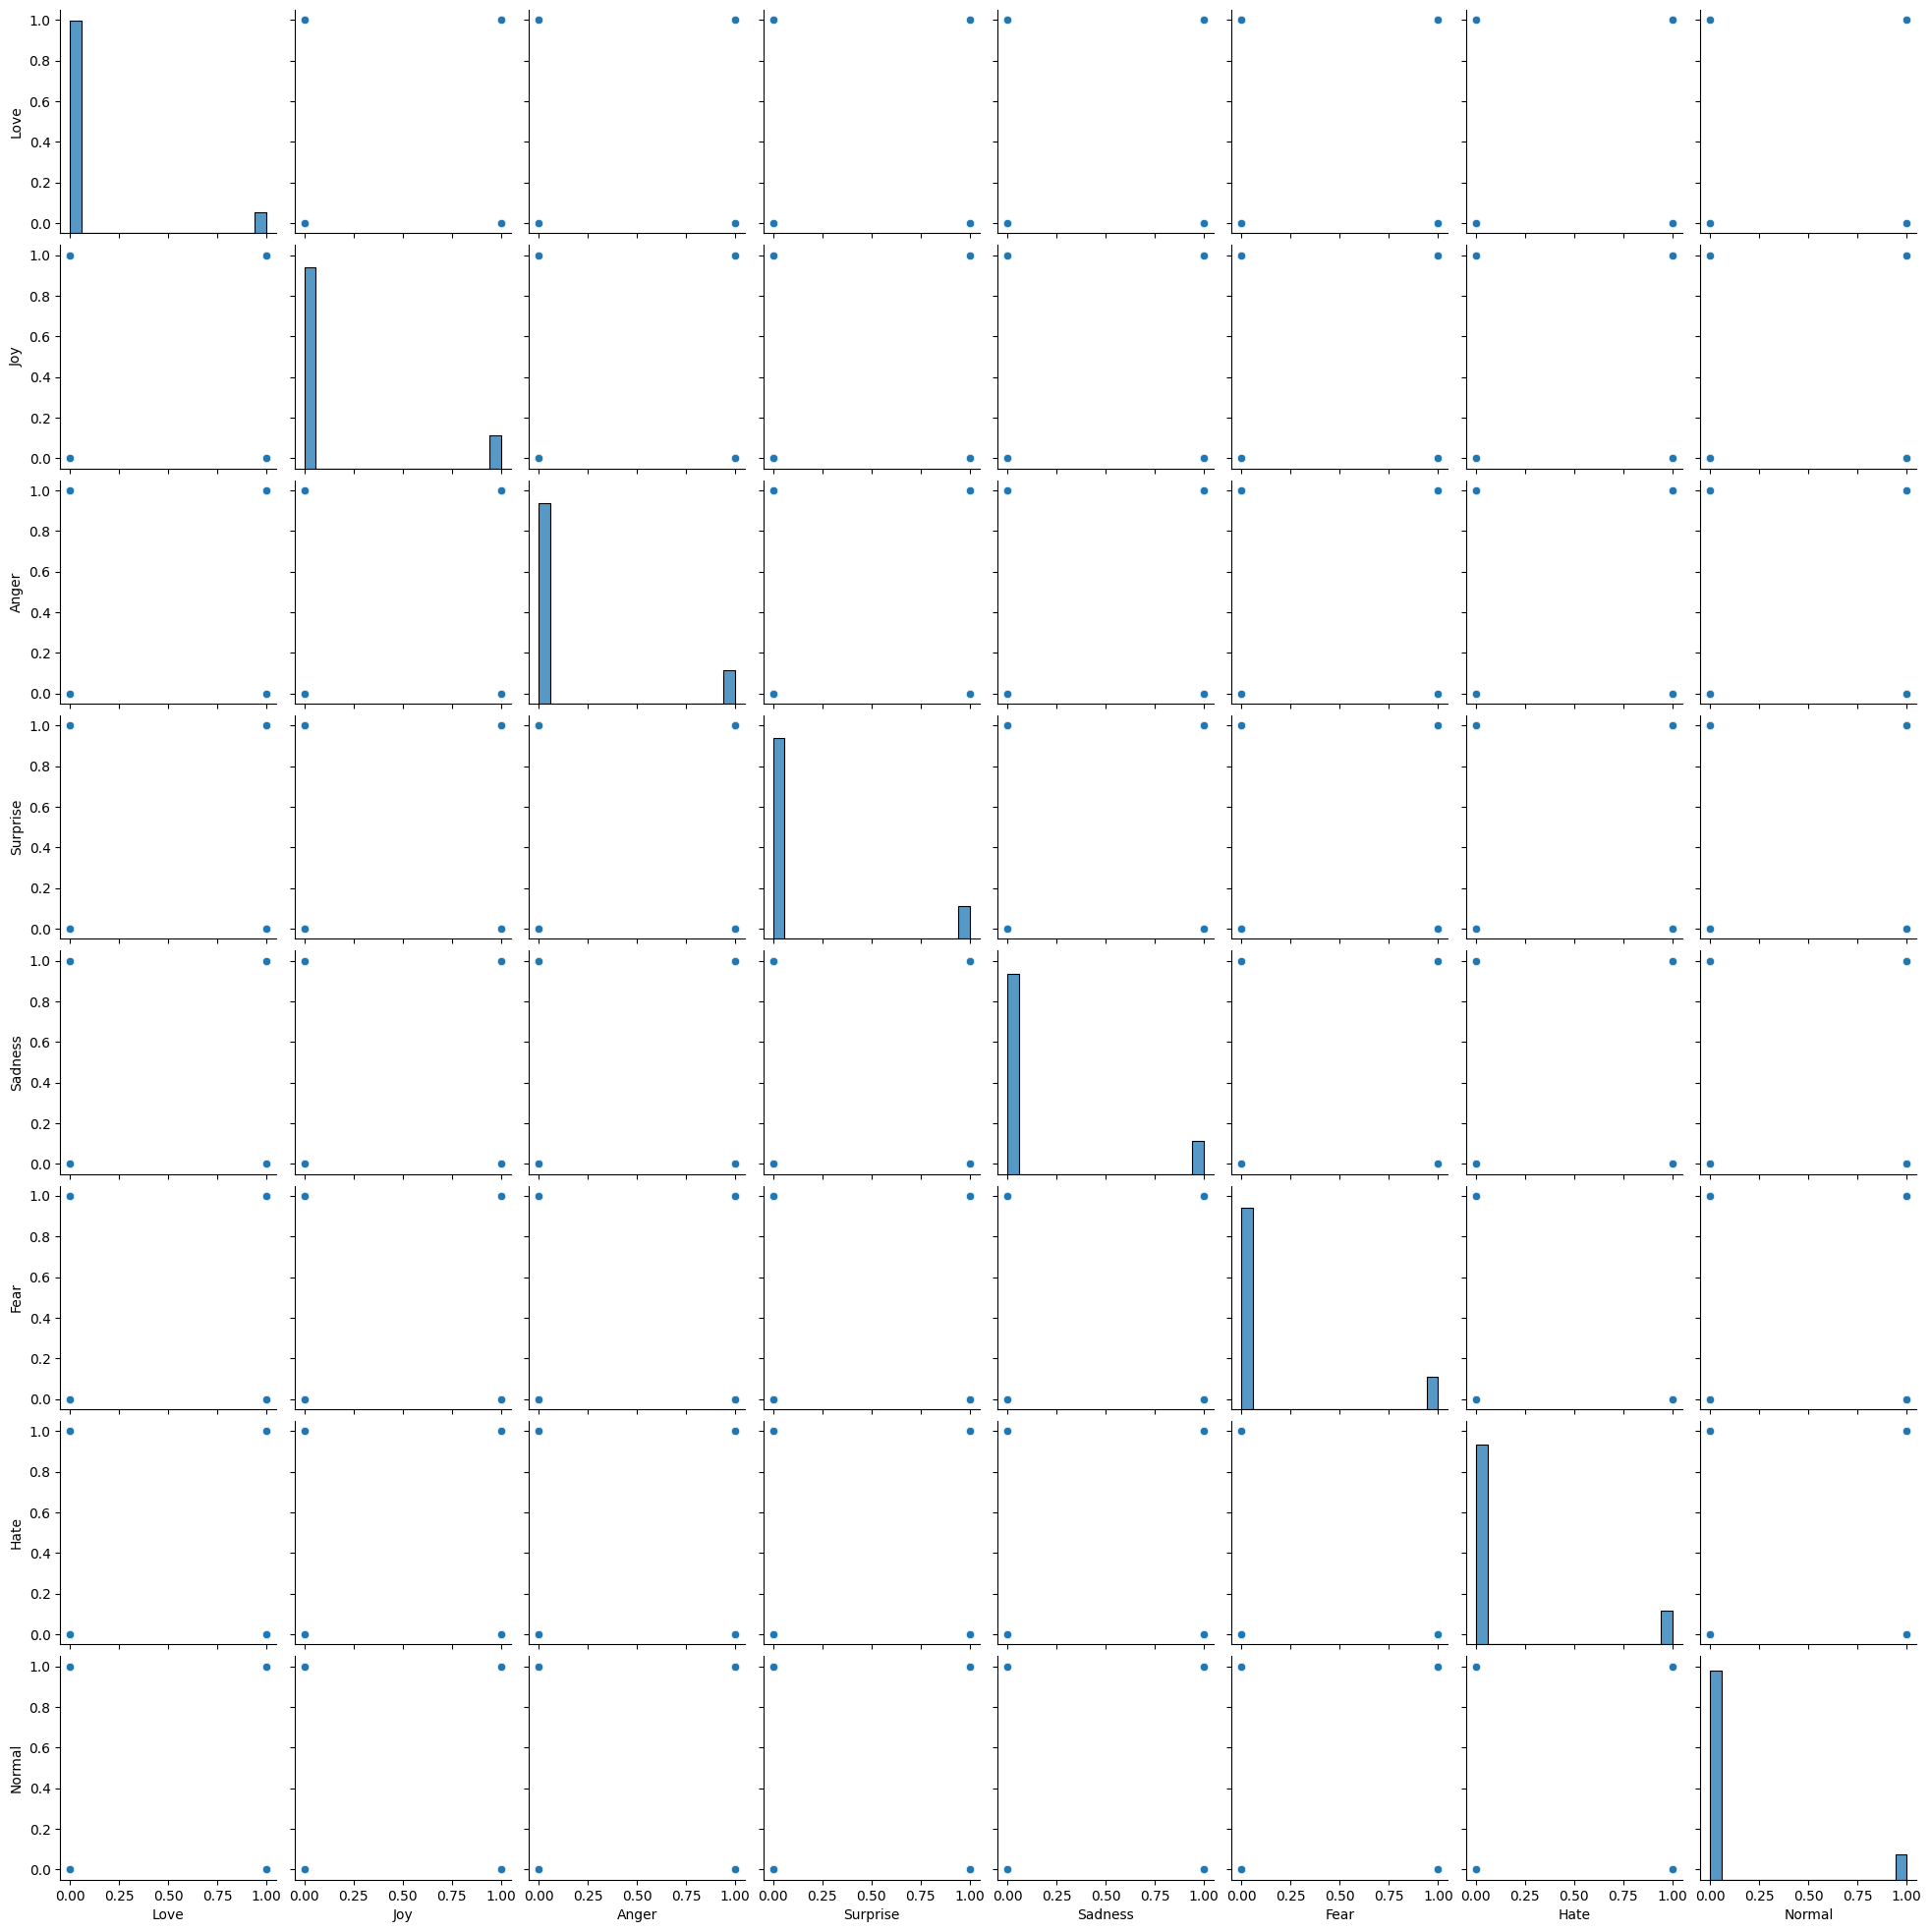

In [ ]:
# 4) Scatter plots to understand relationships
# We'll plot all numeric columns pairwise
print("\n🔗 Scatterplot matrix to see relationships:")
sns.pairplot(df[numeric_cols])
plt.show()




🌡️ Correlation Heatmap:


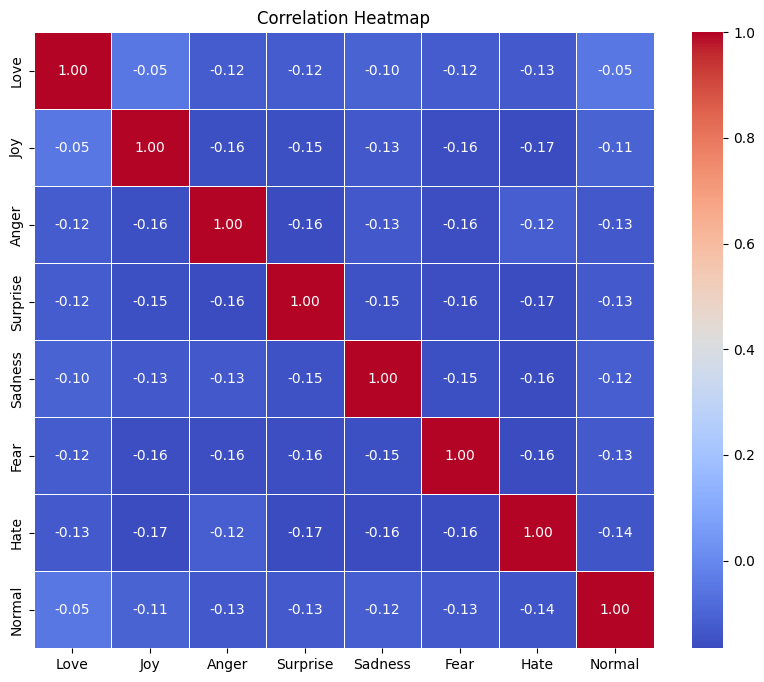

In [ ]:
# 5) Correlation matrix with heatmap
print("\n🌡️ Correlation Heatmap:")
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Check for multicollinearity using Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("\n⚠️ Multicollinearity check using VIF:")
X = df[numeric_cols].dropna()  # Drop rows with NaNs for VIF calculation
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(vif_data)


⚠️ Multicollinearity check using VIF:


,Feature,VIF
0,Love,1.007528
1,Joy,1.006256
2,Anger,1.002470
3,Surprise,1.000409
4,Sadness,1.002507
5,Fear,1.000154
6,Hate,1.001612
7,Normal,1.003836


In [ ]:
import re
import pandas as pd

# --- Define emoji pattern first ---
emoji_re = re.compile(
    "["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map
    u"\U0001F1E0-\U0001F1FF"  # flags
    u"\U00002700-\U000027BF"  # dingbats
    u"\U0001F900-\U0001F9FF"  # supplemental symbols
    u"\U00002600-\U000026FF"  # misc symbols
    u"\U00002B00-\U00002BFF"  # arrows, etc
    u"\U00002000-\U000023FF"  # punctuation & technical symbols
    "]+", flags=re.UNICODE)

# --- Then define your cleaning function ---
def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text)
    # remove _x000d_
    text = re.sub(r'_x000d_', ' ', text, flags=re.IGNORECASE)
    # remove URLs, mentions, hashtags
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text)
    text = re.sub(r'@\w+', ' ', text)
    text = re.sub(r'#\w+', ' ', text)
    # remove emojis
    text = emoji_re.sub('', text)
    # remove punctuation, keep letters & numbers
    text = ''.join(ch for ch in text if ch.isalnum() or ch.isspace())
    # lowercasing
    text = text.lower()
    # collapse spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

print("✅ emoji_re and clean_text() defined successfully!")



✅ emoji_re and clean_text() defined successfully!


In [ ]:
df['Data'] = df['Data'].apply(clean_text)
print("✅ Text cleaned successfully!")


✅ Text cleaned successfully!


In [ ]:
print(df.shape);


(48732, 11)


In [ ]:
TEXT_COL = 'Data'
# Remove rows where text empty after cleaning
before_rows = len(df)
df = df[df[TEXT_COL].str.strip() != '']
print(f"Removed {before_rows - len(df)} rows with empty text after cleaning. Remaining: {len(df)}")


Removed 0 rows with empty text after cleaning. Remaining: 48728


In [ ]:

# 5) Remove duplicates (based on cleaned text) and reset index
dups_before = df.duplicated(subset=[TEXT_COL]).sum()
df = df.drop_duplicates(subset=[TEXT_COL]).reset_index(drop=True)
print("Dropped duplicates (based on text):", dups_before)

Dropped duplicates (based on text): 1076


In [ ]:
EMOTION_COLS = ['Love', 'Joy', 'Anger', 'Surprise', 'Sadness', 'Fear', 'Hate', 'Normal']
for col in EMOTION_COLS:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)



In [ ]:
# show new label counts
print("\n--- emotion positive counts (after cleaning) ---")
for c in EMOTION_COLS:
    print(f"{c}: {df[c].sum()}")


--- emotion positive counts (after cleaning) ---
Love: 4302
Joy: 6828
Anger: 6855
Surprise: 6705
Sadness: 6920
Fear: 5987
Hate: 7042
Normal: 5168


In [ ]:
print(df.shape);


(47652, 11)


In [ ]:
print("\n--- Preview of dataset ---")
display(df.head(10))


--- Preview of dataset ---


,Data,Love,Joy,Anger,Surprise,Sadness,Fear,Hate,Normal,topic,Domain
0,youtube ar volg gula boring hoia jaitase din d...,0,1,0,0,0,0,0,0,Vlog,Twitter
1,your video making camera work is really good i...,0,1,0,0,0,0,0,1,Education,Twitter
2,you made me nostalgic college life a ei dokan ...,0,1,0,0,0,0,0,1,Vlog,Twitter
3,workshop ta engaging but resources ta insuffic...,0,0,0,0,1,0,0,0,Entertainment,Twitter
4,win hoy nay but anek valo khelecu,0,0,0,0,0,0,0,1,Technology,Twitter
5,wifi use kora jayna vlo vabe speed khub e baje...,0,0,0,0,1,0,0,0,Vlog,Twitter
6,west bengal er best food vlogger dadar subscri...,0,0,0,0,0,0,0,1,Brand,Twitter
7,well infinix brand ta oppo vivo techno theke f...,0,1,0,0,1,0,0,0,Personal,Twitter
8,weekend a eto chill korlam but monday e phire ...,0,0,0,0,1,0,0,0,Vlog,Youtube
9,weather ta bhalo but traffic jam ta bhorer dik...,0,0,0,0,1,0,0,0,Vlog,Youtube


In [ ]:
# Save your full preprocessed dataset
df.to_csv("final_preprocessed_dataset.csv", index=False)

print("✅ File saved as final_preprocessed_dataset.csv")


✅ File saved as final_preprocessed_dataset.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/final_preprocessed_dataset.csv"
df.to_csv(path, index=False)
print("✅ File saved to Google Drive:", path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ File saved to Google Drive: /content/drive/MyDrive/final_preprocessed_dataset.csv


In [ ]:
path = "/content/drive/MyDrive/cleaned_bbalanced_dataset.csv"   # change name if you want
balanced_df.to_csv(path, index=False)
print("✅ File saved to Google Drive:", path)

✅ File saved to Google Drive: /content/drive/MyDrive/cleaned_bbalanced_dataset.csv


In [ ]:
FILENAME = 'your_dataset.csv'   # <-- replace with your file if needed
TEXT_COL = 'Data'               # <-- replace if your text column has another name
EMOTION_COLS = ['Love', 'Joy', 'Anger', 'Surprise', 'Sadness', 'Fear', 'Hate', 'Normal']
EXTRA_COLS = ['topic', 'Domain']   # keep if present
SAMPLE_PER_CLASS = 2000
RANDOM_STATE = 42

In [ ]:
import pandas as pd

# define emotion columns and sample settings
EMOTION_COLS = ['Love', 'Joy', 'Anger', 'Surprise', 'Sadness', 'Fear', 'Hate', 'Normal']
SAMPLE_PER_CLASS = 2000
RANDOM_STATE = 42

print(f"\nSampling {SAMPLE_PER_CLASS} per emotion (with replacement when needed)...")

samples = []
shortage_report = {}

for col in EMOTION_COLS:
    subset = df[df[col] == 1].copy()
    n_avail = len(subset)
    if n_avail == 0:
        shortage_report[col] = (0, SAMPLE_PER_CLASS)
        chosen = df.sample(n=SAMPLE_PER_CLASS, replace=True, random_state=RANDOM_STATE).copy()
    elif n_avail >= SAMPLE_PER_CLASS:
        shortage_report[col] = (n_avail, 0)
        chosen = subset.sample(n=SAMPLE_PER_CLASS, replace=False, random_state=RANDOM_STATE).copy()
    else:
        shortage_report[col] = (n_avail, SAMPLE_PER_CLASS - n_avail)
        chosen = subset.sample(n=SAMPLE_PER_CLASS, replace=True, random_state=RANDOM_STATE).copy()
    samples.append(chosen)

balanced_df = pd.concat(samples, ignore_index=True)
balanced_df = balanced_df.sample(frac=1, random_state=RANDOM_STATE).reset_index(drop=True)
print("✅ balanced_df created successfully! Shape:", balanced_df.shape)




Sampling 2000 per emotion (with replacement when needed)...
✅ balanced_df created successfully! Shape: (16000, 11)


In [ ]:
print("✅ balanced_df created successfully! Shape:", balanced_df.shape)

✅ balanced_df created successfully! Shape: (16000, 11)


In [ ]:
# 9) Ensure column order: Data + emotions + extra cols (only those that exist)
cols_order = [TEXT_COL] + EMOTION_COLS + [c for c in EXTRA_COLS if c in balanced_df.columns]
balanced_df = balanced_df[[c for c in cols_order if c in balanced_df.columns]]


In [ ]:
# 10) Save final CSV
out_fname = f'balanced_{len(EMOTION_COLS)*SAMPLE_PER_CLASS}_full.csv'
balanced_df.to_csv(out_fname, index=False, encoding='utf-8')
print("\nSaved balanced dataset to:", out_fname)
print("Final shape:", balanced_df.shape)
print("\nPer-emotion totals (should be SAMPLE_PER_CLASS each):")
print(balanced_df[EMOTION_COLS].sum())


print("\nShortage report (available, shortage):")
for k, v in shortage_report.items():
    print(f" - {k}: available={v[0]}, shortage={v[1]}")


Saved balanced dataset to: balanced_16000_full.csv
Final shape: (16000, 11)

Per-emotion totals (should be SAMPLE_PER_CLASS each):
Love        2267
Joy         2356
Anger       2210
Surprise    2076
Sadness     2289
Fear        2052
Hate        2096
Normal      2270
dtype: int64

Shortage report (available, shortage):
 - Love: available=4302, shortage=0
 - Joy: available=6828, shortage=0
 - Anger: available=6855, shortage=0
 - Surprise: available=6705, shortage=0
 - Sadness: available=6920, shortage=0
 - Fear: available=5987, shortage=0
 - Hate: available=7042, shortage=0
 - Normal: available=5168, shortage=0


In [ ]:

# 11) Colab download helper (uncomment in Colab)
from google.colab import files
files.download(out_fname)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 12) Show few examples
print("\n--- few examples ---")
display(balanced_df.head())


--- few examples ---


,Data,Love,Joy,Anger,Surprise,Sadness,Fear,Hate,Normal,topic,Domain
0,amr friend agei blsilo apndr suggestion common...,0,0,0,0,1,0,0,0,personal,Facebook
1,prothom kichuta valo chilo pore boring golpo,0,0,1,0,0,0,0,0,personal,Youtube
2,bortmane hiro alom kintu kolkatay ache ar amad...,0,0,0,1,0,0,0,0,personal,twitter
3,best of luck but ai dol ta k aro aktu change a...,1,0,0,0,0,0,0,1,Vlog,Youtube
4,vi ajky amar ek friend er bike churi hoisy,0,0,0,0,1,0,0,0,personal,Youtube


In [ ]:
# --- Step 13: Show full dataset info and preview ---
print("✅ Preprocessing completed successfully!")
print("Final dataset shape:", balanced_df.shape)
print("\n--- Columns ---")
print(balanced_df.columns.tolist())

print("\n--- Preview of final cleaned dataset ---")
display(balanced_df.head(10))   # show first 10 rows


✅ Preprocessing completed successfully!
Final dataset shape: (16000, 11)

--- Columns ---
['Data', 'Love', 'Joy', 'Anger', 'Surprise', 'Sadness', 'Fear', 'Hate', 'Normal', 'topic', 'Domain']

--- Preview of final cleaned dataset ---


,Data,Love,Joy,Anger,Surprise,Sadness,Fear,Hate,Normal,topic,Domain
0,amr friend agei blsilo apndr suggestion common...,0,0,0,0,1,0,0,0,personal,Facebook
1,prothom kichuta valo chilo pore boring golpo,0,0,1,0,0,0,0,0,personal,Youtube
2,bortmane hiro alom kintu kolkatay ache ar amad...,0,0,0,1,0,0,0,0,personal,twitter
3,best of luck but ai dol ta k aro aktu change a...,1,0,0,0,0,0,0,1,Vlog,Youtube
4,vi ajky amar ek friend er bike churi hoisy,0,0,0,0,1,0,0,0,personal,Youtube
5,atmar atmo citkar keu dekhena jodi dekhano jet...,0,0,0,0,1,0,0,0,personal,Instagram
6,next must asbe rnnr er rakib bhai,1,0,0,0,0,0,0,0,Vlog,Youtube
7,onek age shunchi gantaar ajke 2032022 eshe gan...,0,0,0,0,1,0,0,0,personal,Youtube
8,presidento vladimir putin chara rashiyar puro ...,0,0,0,1,0,0,0,0,personal,Facebook
9,jjofosbo ijosojopok joksobbokso mjodvosno ksob...,0,0,0,0,1,0,0,0,personal,Youtube
